In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
#import plotly.offline as py#visualization
#py.init_notebook_mode(connected=True)#visualization
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.figure_factory as ff

# Understanding our dataset

In [2]:
telcom = pd.read_csv('Telco_Customer_Churn.csv')
telcom.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telcom.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
# Drop rows with any empty cells 
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)


In [6]:
telcom= telcom.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [7]:
telcom.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
telcom.count() #now df has 7032 

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [4]:
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#change totalcharge datatype from object to float
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), o

In [6]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Tenure to categorical column (Feature Engineering)
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0_12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12_24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 36) :
        return "Tenure_24_36"
    elif (telcom["tenure"] > 36) & (telcom["tenure"] <= 48) :
        return "Tenure_36_48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48_60"
    elif (telcom["tenure"] > 60) :
        return "Tenure_gt_60"
    
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

telcom = telcom.drop(['tenure'], axis=1) #now delete orginal tenure column

telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24_36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_36_48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_12


In [20]:
#delete customerID column becasue it won't be used in machine learning models
telcom = telcom.drop(['customerID'], axis=1) #now delete orginal tenure column

In [7]:
telcom

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24_36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_36_48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_12
5,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0_12
6,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Tenure_12_24
7,Female,No,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Tenure_0_12
8,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24_36
9,Male,No,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,Tenure_gt_60


In [3]:
telcom = pd.read_csv('Processed Telco File for Tableau.csv')

In [13]:
telcom.to_csv('Processed Telco File for Tableau_temp.csv',index=False)

In [21]:
telcom = pd.read_csv('Processed Telco File for Tableau_temp.csv')

In [8]:
#get the count of churn and non churn customers
telcom.groupby(["Churn"]).count() #Churn= 5163 & Non churn = 1869

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
Churn,,,,,,,,,,,,,,,,,,,
No,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [9]:
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]


In [6]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [10]:
#finding correaltion between Monthly charges and Total charges. Because we only have two numeric variables in our dataset.
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(telcom['MonthlyCharges'], telcom['TotalCharges'])
print('Pearsons correlation: %.3f' % corr)
#it doesn't look like there is high correaltion hence will use both the variables.

Pearsons correlation: 0.651


# Data Pre-processing 

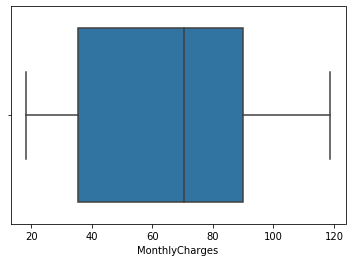

In [11]:
#check for outliers in the dataset
import seaborn as sns
sns.boxplot(x=telcom['MonthlyCharges'])

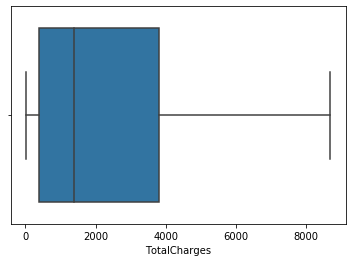

In [22]:
sns.boxplot(x=telcom['TotalCharges'])
#we don't need to deal with outlers because there is not outliers in numerical columns 

In [23]:
#Handling Categorical Data using one-hot encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(telcom[var], prefix=var)
    telcom1=telcom.join(cat_list)
    telcom=telcom1
    
cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']
telcom_vars=telcom.columns.values.tolist()
to_keep=[i for i in telcom_vars if i not in cat_vars]

In [24]:
telcom_final=telcom[to_keep]
#data_final.columns.values

In [26]:
telcom_final.columns.values

array(['MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenur

In [28]:
#Scaling Numerical columns
telcom_final_copy = telcom_final.copy()
num_cols = ['MonthlyCharges', 'TotalCharges']

std = StandardScaler()
scaled = std.fit_transform(telcom_final[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns

telcom_final = telcom_final.drop(columns = num_cols,axis = 1)
telcom_final = telcom_final.merge(scaled,left_index=True,right_index=True,how = "left")

telcom_final.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0_12,tenure_group_Tenure_12_24,tenure_group_Tenure_24_36,tenure_group_Tenure_36_48,tenure_group_Tenure_48_60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,No,1,0,1,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,-1.161694,-0.994194
1,No,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.260878,-0.173740
2,Yes,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,-0.363923,-0.959649
3,No,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,Yes,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.196178,-0.940457


In [58]:
telcom_final.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0_12,tenure_group_Tenure_12_24,tenure_group_Tenure_24_36,tenure_group_Tenure_36_48,tenure_group_Tenure_48_60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,No,1,0,1,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,-1.161694,-0.994194
1,No,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.260878,-0.173740
2,Yes,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,-0.363923,-0.959649
3,No,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,Yes,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.196178,-0.940457


In [30]:
telcom_final.to_csv('Processed Telco File for ML.csv',index=False)

In [3]:
telcom_final = pd.read_csv('Processed Telco File for ML_1.csv')

In [9]:
telcom_final["Churn"] = telcom_final["Churn"].replace({"Yes":1,"No":0})

In [4]:
telcom_final.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0_12,tenure_group_Tenure_12_24,tenure_group_Tenure_24_36,tenure_group_Tenure_36_48,tenure_group_Tenure_48_60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,-1.161694,-0.994194
1,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.260878,-0.173740
2,1,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,-0.363923,-0.959649
3,0,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,1,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.196178,-0.940457


In [11]:
telcom_final.to_csv('Processed Telco File for ML_1.csv',index=False)

In [5]:
print ("Rows     : " ,telcom_final.shape[0])
print ("Columns  : " ,telcom_final.shape[1])

Rows     :  7032
Columns  :  46


# Model Building

In [6]:
# create training and testing vars
X = telcom_final.loc[:, telcom_final.columns != 'Churn']
y = telcom_final.loc[:, telcom_final.columns == 'Churn']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 45) (5274, 1)
(1758, 45) (1758, 1)


# Baseline modiel - LogisticRegression

In [22]:
#Baseline modiel - LogisticRegression
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, LogReg_model.predict(X_test)))

[[1200  111]
 [ 222  225]]


In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, LogReg_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1311
           1       0.67      0.50      0.57       447

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [17]:
LogReg_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LogReg_model.predict(X_test))

0.7093437562391535

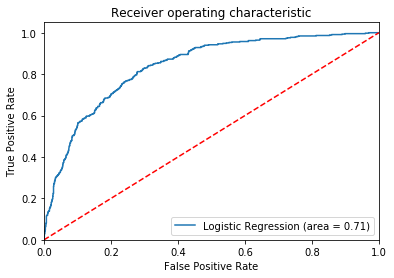

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LogReg_model_roc_auc = roc_auc_score(y_test, LogReg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LogReg_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

(5274, 45) (5274, 1)


In [7]:
y_train['Churn'].value_counts() # count before SMOTE

0    3852
1    1422
Name: Churn, dtype: int64

In [9]:
pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [8]:
# LogisticRegression with SMOTE (Balanced training dataset)

#oversampling minority class in training dataset using smote
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train_os,y_train_os = os.fit_sample(X_train,y_train)

In [9]:
y_train_os['Churn'].value_counts() #count after SMOTE

1    3852
0    3852
Name: Churn, dtype: int64

In [10]:
X_train_os.shape

(7704, 45)

# LogisticRegression with SMOTE 

In [17]:
#LogisticRegression with SMOTE 
from sklearn.linear_model import LogisticRegression
LogReg_smote = LogisticRegression()
LogReg_smote.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, LogReg_smote.predict(X_test)))

[[1148  163]
 [ 188  259]]


In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, LogReg_smote.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1311
           1       0.61      0.58      0.60       447

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [20]:
LogReg_smote.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LogReg_smote.predict(X_test))

0.7275428869810943

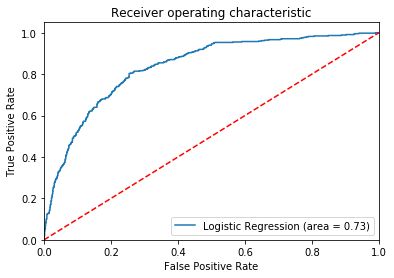

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LogReg_smote_roc_auc = roc_auc_score(y_test, LogReg_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LogReg_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RandomForest without SMOTE

In [26]:
#RandomForest without SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=25, random_state=12)
rf_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, rf_model.predict(X_test)))

[[1159  152]
 [ 237  210]]


In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1311
           1       0.58      0.47      0.52       447

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [29]:
rf_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict(X_test))

0.6769283143663067

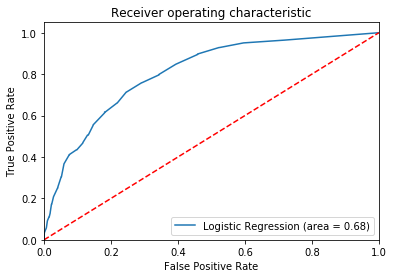

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_model_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RandomForest with SMOTE

In [32]:
#RandomForest with SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier(n_estimators=25, random_state=12)
rf_model_smote.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, rf_model_smote.predict(X_test)))

[[1104  207]
 [ 201  246]]


In [34]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, rf_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1311
           1       0.54      0.55      0.55       447

    accuracy                           0.77      1758
   macro avg       0.69      0.70      0.70      1758
weighted avg       0.77      0.77      0.77      1758



In [35]:
rf_model_smote.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model_smote.predict(X_test))

0.6962204168138466

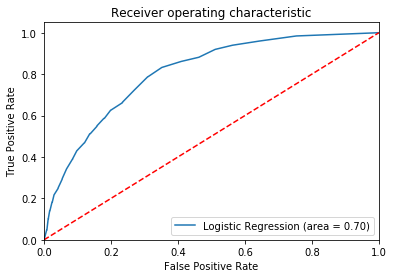

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_smote_roc_auc = roc_auc_score(y_test, rf_model_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Plot feature importance

In [45]:
col_names = ['gender_Female', 'gender_Male', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_Tenure_0_12', 'tenure_group_Tenure_12_24',
       'tenure_group_Tenure_24_36', 'tenure_group_Tenure_36_48',
       'tenure_group_Tenure_48_60', 'tenure_group_Tenure_gt_60',
       'MonthlyCharges', 'TotalCharges']

In [47]:
import pandas as pd
feature_imp = pd.Series(rf_model_smote.feature_importances_,index=col_names).sort_values(ascending=False)
feature_imp

TotalCharges                               0.136816
MonthlyCharges                             0.120850
Contract_Month-to-month                    0.065516
Contract_Two year                          0.048095
tenure_group_Tenure_0_12                   0.034874
InternetService_Fiber optic                0.034288
PaymentMethod_Electronic check             0.030850
Contract_One year                          0.026622
OnlineSecurity_Yes                         0.023666
PaperlessBilling_No                        0.021984
InternetService_No                         0.021044
PaymentMethod_Credit card (automatic)      0.020277
tenure_group_Tenure_gt_60                  0.019818
TechSupport_Yes                            0.019627
Dependents_Yes                             0.018770
gender_Female                              0.018218
SeniorCitizen_No                           0.016309
gender_Male                                0.015935
Partner_Yes                                0.015845
PaymentMetho

No handles with labels found to put in legend.


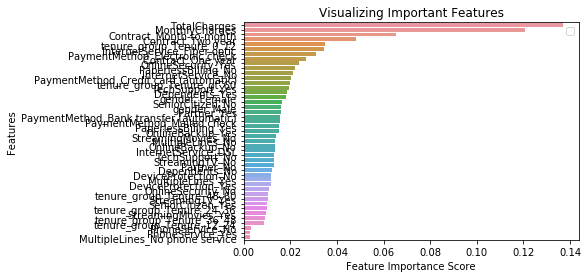

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBOOST without SMOTE

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
import xgboost as xgb

In [18]:
# fit model on unbalanced training data 
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, xgb_model.predict(X_test)))

[[1159  152]
 [ 223  224]]


In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1311
           1       0.60      0.50      0.54       447

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [21]:
xgb_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_model.predict(X_test))

0.6925882696235776

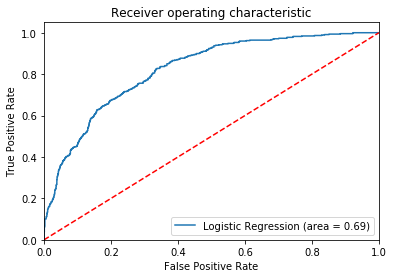

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_model_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % xgb_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBOOST with SMOTE

In [27]:
# fit model on balanced training data using SMOTE
from xgboost import XGBClassifier
xgb_model_smote = XGBClassifier()
xgb_model_smote.fit(X_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, xgb_model_smote.predict(X_test)))

[[1132  179]
 [ 195  252]]


In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, xgb_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1311
           1       0.58      0.56      0.57       447

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_model_smote.predict(X_test))

0.7136106973005903

# SVM without SMOTE

In [31]:
#SVM without grid search
from sklearn.svm import SVC

svm_model = SVC(kernel= 'linear',C=1.0,random_state=0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_model.predict(X_test)))

[[1206  105]
 [ 250  197]]


In [33]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1311
           1       0.65      0.44      0.53       447

    accuracy                           0.80      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.80      0.78      1758



In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svm_model.predict(X_test))

0.680312175244063

# SVM with SMOTE

In [39]:
#SVM without grid search
from sklearn.svm import SVC

svm_model_smote = SVC(kernel= 'rbf',C=1.0,random_state=0)
svm_model_smote.fit(X_train_os, y_train_os)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_model_smote.predict(X_test)))

[[1157  154]
 [ 186  261]]


In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, svm_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1311
           1       0.63      0.58      0.61       447

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svm_model_smote.predict(X_test))

0.733212517725595

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,cv=5,verbose=2)
grid.fit(X_train_os,y_train_os)

In [72]:
print(grid.best_estimator_)


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [74]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[1060  251]
 [ 138  309]]


In [75]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1311
           1       0.55      0.69      0.61       447

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.79      1758



In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict(X_test))

0.7499091323289256

In [73]:
# Use independent test dataset
# to estimate performance of best-selected model
clf = grid.best_estimator_
clf.fit(X_train_os,y_train_os)
print('Test accuracy: %.3f' % clf.score(X_train_os,y_train_os))


Test accuracy: 0.830


# Neutral Network (Multi-layer Perceptron Classifer) without SMOTE

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(30,))

In [45]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, mlp.predict(X_test)))

[[1195  116]
 [ 246  201]]


In [47]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1311
           1       0.63      0.45      0.53       447

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mlp.predict(X_test))

0.6805911773890518

# Neutral Network (Multi-layer Perceptron Classifer) with SMOTE

In [64]:
mlp_smote = MLPClassifier(hidden_layer_sizes=(30,))

In [65]:
mlp_smote.fit(X_train_os, y_train_os)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, mlp_smote.predict(X_test)))

[[1144  167]
 [ 200  247]]


In [67]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, mlp_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1311
           1       0.60      0.55      0.57       447

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mlp_smote.predict(X_test))

0.7125945151761809

In [12]:
telcom.to_csv('Processed Telco File 1.csv',index=False)

ProcessedDF = pd.read_csv('Processed Telco File 1.csv')
ProcessedDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_group_Tenure_30-36,tenure_group_Tenure_36-42,tenure_group_Tenure_42-48,tenure_group_Tenure_48-54,tenure_group_Tenure_54-60,tenure_group_Tenure_6-12,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.239504,0.196178,-0.940457


In [13]:
print ("Rows     : " ,ProcessedDF.shape[0])
print ("Columns  : " ,ProcessedDF.shape[1])

Rows     :  7032
Columns  :  41


In [14]:
#SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

cols    = [i for i in telcom.columns if i not in Id_col+target_col]

smote_X = telcom[cols]
smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0, ratio = 1.0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [15]:
print ("Rows     : " ,os_smote_Y.shape[0])
print ("Columns  : " ,os_smote_Y.shape[1])

Rows     :  7790
Columns  :  1


In [16]:
#randomForest with SMOTE
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(os_smote_X, os_smote_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(smote_test_Y, clf_rf.predict(smote_test_X)))

[[1106  162]
 [ 220  270]]


In [48]:
print(classification_report(smote_test_Y, clf_rf.predict(smote_test_X)))
print('Recall: %.2f' % recall_score(smote_test_Y, clf_rf.predict(smote_test_X))) 
print('Accuracy: %.2f' % accuracy_score(smote_test_Y,clf_rf.predict(smote_test_X)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1268
           1       0.62      0.55      0.59       490

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.78      0.78      1758

Recall: 0.55
Accuracy: 0.78


In [20]:
print('Validation Results with SMOTE')
#print( clf_rf.score(smote_test_X, smote_test_Y))
print('Recall: %.2f' % recall_score(smote_test_Y, clf_rf.predict(smote_test_X))) 
print('Accuracy: %.2f' % accuracy_score(smote_test_Y,clf_rf.predict(smote_test_X)))


Validation Results with SMOTE
Recall: 0.55
Accuracy: 0.78


In [21]:
#Baseline Model - RandomForest without SMOTE
clf_rf_org = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf_org.fit(smote_train_X, smote_train_Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [22]:
print(confusion_matrix(smote_test_Y, clf_rf_org.predict(smote_test_X)))

[[1133  135]
 [ 259  231]]


In [23]:
print(classification_report(smote_test_Y, clf_rf_org.predict(smote_test_X)))
print('Recall: %.2f' % recall_score(smote_test_Y, clf_rf_org.predict(smote_test_X))) 
print('Accuracy: %.2f' % accuracy_score(smote_test_Y,clf_rf_org.predict(smote_test_X)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1268
           1       0.63      0.47      0.54       490

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.76      0.78      0.76      1758

Recall: 0.47
Accuracy: 0.78


In [24]:
print('Validation Results without SMOTE')

print('Recall: %.2f' % recall_score(smote_test_Y, clf_rf_org.predict(smote_test_X))) 
print('Accuracy: %.2f' % accuracy_score(smote_test_Y,clf_rf_org.predict(smote_test_X)))


Validation Results without SMOTE
Recall: 0.47
Accuracy: 0.78


In [25]:
X_svm = telcom[cols]
Y_svm = telcom[target_col]

#Split train and test data
train_X,test_X,train_Y,test_Y = train_test_split(X_svm,Y_svm,test_size = .25 , random_state = 0)

#SVM without grid search
from sklearn.svm import SVC

svm = SVC(kernel= 'linear',C=1.0,random_state=0)
svm.fit(train_X,train_Y)
y_pred = svm.predict(test_X)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(test_Y, y_pred))

Accuracy: 0.80


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(test_Y, y_pred))

[[1215   96]
 [ 250  197]]


In [28]:
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1311
           1       0.67      0.44      0.53       447

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.68      0.70      1758
weighted avg       0.79      0.80      0.79      1758



In [29]:
#SVM with grid search

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Set parameter range
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# Set param_grid to a list of dictionaries - specify parameters to tune
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]

In [32]:
# set up k-fold cross-validation 
grid = GridSearchCV(estimator=svm,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [33]:
# Use training data to perform grid search 
#grid = grid.fit(train_X,train_Y)

# Obtain the score of the best-performing model
print(grid.best_score_)

# print the parameters of the best-performing model
print(grid.best_params_)


AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
# Use independent test dataset
# to estimate performance of best-selected model
clf = grid.best_estimator_
clf.fit(train_X,train_Y)
print('Test accuracy: %.3f' % clf.score(train_X,train_Y))


In [ ]:
y_grid_pred = clf.predict(test_X)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(test_Y, y_grid_pred))

In [ ]:
print(confusion_matrix(test_Y, y_grid_pred))

In [ ]:
print(classification_report(test_Y, y_grid_pred))